In [35]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from sklearn.datasets import make_classification
from imblearn.pipeline import make_pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
df= pd.read_csv('creditcard.csv',nrows=50000)
df.shape

(50000, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    50000 non-null  int64  
 1   V1      50000 non-null  float64
 2   V2      50000 non-null  float64
 3   V3      50000 non-null  float64
 4   V4      50000 non-null  float64
 5   V5      50000 non-null  float64
 6   V6      50000 non-null  float64
 7   V7      50000 non-null  float64
 8   V8      50000 non-null  float64
 9   V9      50000 non-null  float64
 10  V10     50000 non-null  float64
 11  V11     50000 non-null  float64
 12  V12     50000 non-null  float64
 13  V13     50000 non-null  float64
 14  V14     50000 non-null  float64
 15  V15     50000 non-null  float64
 16  V16     50000 non-null  float64
 17  V17     50000 non-null  float64
 18  V18     50000 non-null  float64
 19  V19     50000 non-null  float64
 20  V20     50000 non-null  float64
 21  V21     50000 non-null  float64
 22

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df.Class.value_counts()

0    49852
1      148
Name: Class, dtype: int64

Imbalanced data

In [19]:
X= df.drop(['Time','Class'],axis=1)

In [20]:
y=df.Class

In [21]:
X.shape,y.shape

((50000, 29), (50000,))

# Sampling

     UnderSampling -> Reducing learger representative 
     OverSampling -> Increasing smaller representative 

In [22]:
X,y= make_classification(n_samples=5000,n_features=2,n_informative=2,
                        n_redundant=0, n_repeated=0, n_classes =3,
                        n_clusters_per_class =1,
                        weights=[0.01,0.05,0.94],
                        class_sep=0.8, random_state=0)

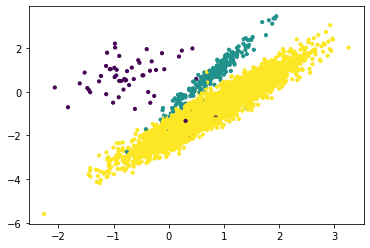

In [23]:
plt.scatter(X[:,0],X[:,1],c=y,s=10)

In [25]:
X_resampled, y_resampled= SMOTE().fit_resample(X,y)

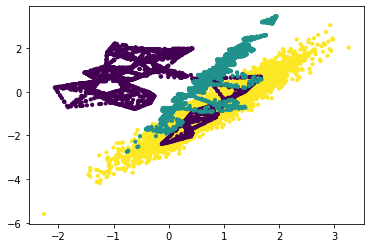

In [26]:
plt.scatter(X_resampled[:,0],X_resampled[:,1],c=y_resampled,s=10)

In [27]:
Xresampled, yresampled= SMOTEENN().fit_resample(X,y)

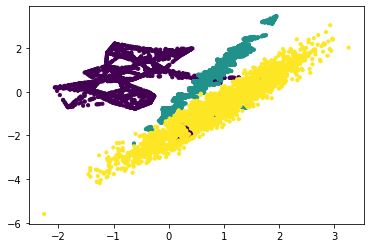

In [28]:
plt.scatter(Xresampled[:,0],Xresampled[:,1],c=yresampled,s=10)

As surrounding data is not of the particular class it removes that and try to generate more from that class

# Choosing Estimator

In [30]:
models=[SGDClassifier(),RandomForestClassifier(),SVC()]
samplers=[SMOTE(),SMOTEENN()]

In [32]:
model_pipelines=[]
for model in models:
    for sampler in samplers:
        pipeline=make_pipeline(StandardScaler(),sampler,model)
        model_pipelines.append(pipeline)

In [33]:
model_pipelines

[Pipeline(steps=[('standardscaler', StandardScaler()), ('smote', SMOTE()),
                 ('sgdclassifier', SGDClassifier())]),
 Pipeline(steps=[('standardscaler', StandardScaler()), ('smoteenn', SMOTEENN()),
                 ('sgdclassifier', SGDClassifier())]),
 Pipeline(steps=[('standardscaler', StandardScaler()), ('smote', SMOTE()),
                 ('randomforestclassifier', RandomForestClassifier())]),
 Pipeline(steps=[('standardscaler', StandardScaler()), ('smoteenn', SMOTEENN()),
                 ('randomforestclassifier', RandomForestClassifier())]),
 Pipeline(steps=[('standardscaler', StandardScaler()), ('smote', SMOTE()),
                 ('svc', SVC())]),
 Pipeline(steps=[('standardscaler', StandardScaler()), ('smoteenn', SMOTEENN()),
                 ('svc', SVC())])]

In [34]:
X=df.drop(['Time','Class'],axis=1)
y=df.Class
X.shape,y.shape

((50000, 29), (50000,))

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [38]:
for pipeline in model_pipelines:
    pipeline.fit(X_train,y_train)

In [40]:
for pipeline in model_pipelines:
    print('{} score: {} '.format(pipeline,pipeline.score(X_test,y_test)))

Pipeline(steps=[('standardscaler', StandardScaler()), ('smote', SMOTE()),
                ('sgdclassifier', SGDClassifier())]) score: 0.98808 
Pipeline(steps=[('standardscaler', StandardScaler()), ('smoteenn', SMOTEENN()),
                ('sgdclassifier', SGDClassifier())]) score: 0.98808 
Pipeline(steps=[('standardscaler', StandardScaler()), ('smote', SMOTE()),
                ('randomforestclassifier', RandomForestClassifier())]) score: 0.99928 
Pipeline(steps=[('standardscaler', StandardScaler()), ('smoteenn', SMOTEENN()),
                ('randomforestclassifier', RandomForestClassifier())]) score: 0.99928 
Pipeline(steps=[('standardscaler', StandardScaler()), ('smote', SMOTE()),
                ('svc', SVC())]) score: 0.99376 
Pipeline(steps=[('standardscaler', StandardScaler()), ('smoteenn', SMOTEENN()),
                ('svc', SVC())]) score: 0.99376 
